# Time-dependent PDEs

In [1]:
import numpy as np
import matplotlib.pyplot as pt

In [2]:
def rk4_step(y, t, h, f):
    k1 = f(t, y)
    k2 = f(t+h/2, y + h/2*k1)
    k3 = f(t+h/2, y + h/2*k2)
    k4 = f(t+h, y + h*k3)
    return y + h/6*(k1 + 2*k2 + 2*k3 + k4)

In [11]:
mesh = np.linspace(0, 1, 200)
dx = mesh[1]-mesh[0]

(all of the PDEs below use *periodic* boundary conditions: $u(0)=u(1)$)

**Advection equation:** $u_t+u_x=0$

Equivalent: $u_t=-u_x$

In [12]:
def f_advection(t, u):
    du = (np.roll(u, -1, axis=-1) - np.roll(u, 1, axis=-1))/(2*dx)
    return -du

**Heat equation:** $u_t=u_{xx}$

In [13]:
def f_heat(t, u):
    d2u = (
        np.roll(u, -1, axis=-1)
        - 2*u
        + np.roll(u, 1, axis=-1))/(dx**2)
    return d2u

**Wave equation:** $u_{tt}=u_{xx}$

NOTE: Two time derivatives $\rightarrow$ convert to first order ODE.

$$u_t=v$$
$$v_t=u_{xx}$$


In [14]:
def f_wave(t, w):
    u, v = w
    d2u = (
        np.roll(u, -1, axis=-1)
        - 2*u
        + np.roll(u, 1, axis=-1))/(dx**2)
    return np.array([v, d2u])

**Initial condition**

In [15]:
current_t = 0

#current_u = np.sin(2*np.pi*mesh)*0.5+1
#current_u = (mesh > 0.3) & (mesh < 0.7)
#current_u = (mesh > 0.45) & (mesh < 0.55)
current_u = np.exp(-(mesh-0.5)**2*150)
#current_u = 2*np.abs(mesh-0.5)

current_u = np.array([current_u], dtype=np.float64)
current_u.shape

(1, 200)

In [16]:
# Add a second component if needed (for wave equation)
current_u = np.vstack([current_u,np.zeros(len(mesh))])
current_u.shape

(2, 200)

**Time loop**

Run this cell many times in place (using Ctrl-Enter):

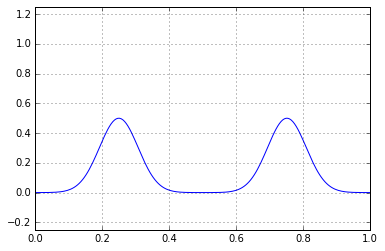

In [26]:
dt = dx # experiment with this

#current_f = f_advection
#current_f = f_heat
current_f = f_wave

for i in range(5): # takes this many time steps at a time
    current_u = rk4_step(current_u, current_t, dt, current_f)
    current_t += dt

pt.ylim([-0.25, 1.25])
pt.grid()
pt.plot(mesh, current_u[0])